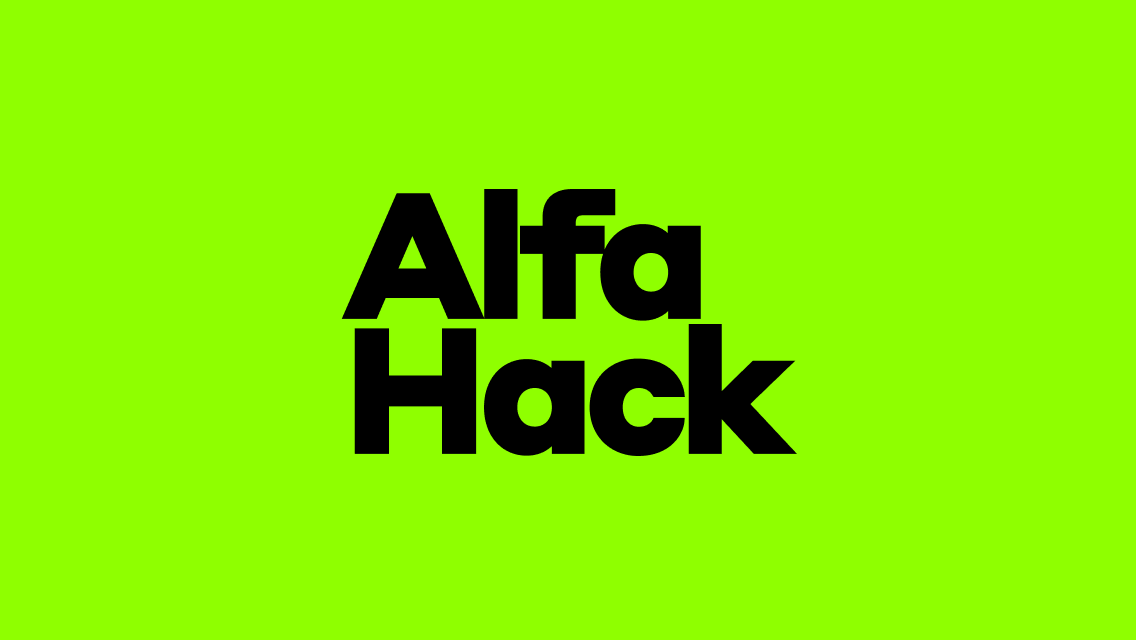

## Этап 1. Установка библиотек и импорт данных

In [1]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import glob
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 3"_, то необходимо поменять путь к директории и ссылки ниже

In [ ]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/train'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/test'

Получим список файлов в каждой из папок с данными

In [ ]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Объединим тренировочные и тестовые данные в единые датасеты train и test

In [ ]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

In [ ]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

## Этап 2. Работа с моделью

In [ ]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

## Этап 3. Предсказание для тестовых данных

Получим предсказание на тестовых данных

In [ ]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case3.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.

In [4]:
prediction = pd.read_csv('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/baseline_submission_case3.csv')
prediction.shape

(171919, 2)